## Data Preparation and Exploration

This notebook is focused on preparing, cleaning and exploring a dataset of 2022 annual CDC survey data of 400k+ adults related to their health status.

The goal is to apply this dataset to machine learning models to predict an individual's propensity to having a heart disease.

Points to look out for in a clean data:
* Making sure the data is presented in a way that makes sense with all the variables correct.
* Ensure that the variables make sense and are correct.
* Eliminating duplicate rows and columns as well as elimiating columns that provide redundant information.
* Dealing with missing data appropriately.

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

### Preliminary Analysis

In [2]:
### Reading in the data
dataset = pd.read_csv('data/2022/heart_2022.csv')
dataset.head(20)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
5,Alabama,Male,Poor,1.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,NaN,Yes,...,1.80,84.82,26.08,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
6,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,62.60,22.96,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
7,Alabama,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,1.63,73.48,27.81,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
8,Alabama,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,NaN,No,...,1.70,NaN,NaN,No,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,No
9,Alabama,Female,Good,1.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.68,81.65,29.05,Yes,NaN,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
### Analyzing the size of the dataset
dataset.shape

(445132, 40)

The above shows that there are 445,132 rows and 40 columns in the dataset

In [4]:
# A summary of each column, the datatypes and the number of non-null values 

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

From the above, the dataset consists of 445,132 rows and 40 columns. The dataset consists of 2022 annual CDC survey data of 400k+ adults related to their health status. Each row in the dataset represents the personal and health information of each adult that was surveyed.
It can also be seen that there are a lot of missing values in the dataset however the datatype of each column makes sense.

In [5]:
# Ensuring that each numerical value, makes sense:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
PhysicalHealthDays,434205.0,4.347919,8.688912,0.00,0.00,0.00,3.00,30.00
MentalHealthDays,436065.0,4.382649,8.387475,0.00,0.00,0.00,5.00,30.00
SleepHours,439679.0,7.022983,1.502425,1.00,6.00,7.00,8.00,24.00
HeightInMeters,416480.0,1.702691,0.107177,0.91,1.63,1.70,1.78,2.41
WeightInKilograms,403054.0,83.074470,21.448173,22.68,68.04,80.74,95.25,292.57
BMI,396326.0,28.529842,6.554889,12.02,24.13,27.44,31.75,99.64


There doesn't seem to be any outrageous numerical value in the dataset.

### Checking for Duplicate rows/ redundant information

In [6]:
#Checking for duplicate rows
dataset.duplicated().sum()

157

In [7]:
# Dropping the duplicate rows since they make up a small part of the dataset
dataset.drop_duplicates(inplace=True)

In [8]:
#Checking for duplicate columns
dataset.T.duplicated()

State                        False
Sex                          False
GeneralHealth                False
PhysicalHealthDays           False
MentalHealthDays             False
LastCheckupTime              False
PhysicalActivities           False
SleepHours                   False
RemovedTeeth                 False
HadHeartAttack               False
HadAngina                    False
HadStroke                    False
HadAsthma                    False
HadSkinCancer                False
HadCOPD                      False
HadDepressiveDisorder        False
HadKidneyDisease             False
HadArthritis                 False
HadDiabetes                  False
DeafOrHardOfHearing          False
BlindOrVisionDifficulty      False
DifficultyConcentrating      False
DifficultyWalking            False
DifficultyDressingBathing    False
DifficultyErrands            False
SmokerStatus                 False
ECigaretteUsage              False
ChestScan                    False
RaceEthnicityCategor

### Dealing with the missing values

In [9]:
# Calculating the proportion of missing values in the dataset
dataset.isna().sum(axis=0)/dataset.shape[0]*100

State                         0.000000
Sex                           0.000000
GeneralHealth                 0.268105
PhysicalHealthDays            2.454520
MentalHealthDays              2.036519
LastCheckupTime               1.865498
PhysicalActivities            0.244508
SleepHours                    1.224338
RemovedTeeth                  2.551829
HadHeartAttack                0.687679
HadAngina                     0.988820
HadStroke                     0.348784
HadAsthma                     0.397326
HadSkinCancer                 0.705208
HadCOPD                       0.497556
HadDepressiveDisorder         0.630822
HadKidneyDisease              0.431710
HadArthritis                  0.590595
HadDiabetes                   0.243160
DeafOrHardOfHearing           4.607450
BlindOrVisionDifficulty       4.813529
DifficultyConcentrating       5.414911
DifficultyWalking             5.363672
DifficultyDressingBathing     5.341873
DifficultyErrands             5.733131
SmokerStatus             

#### Starting with the numerical values:

Dealing with missing values in the continuous data columns:

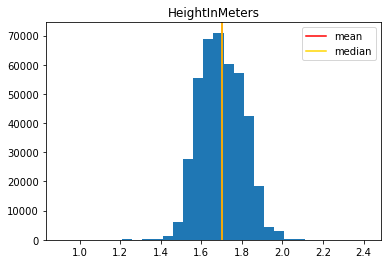

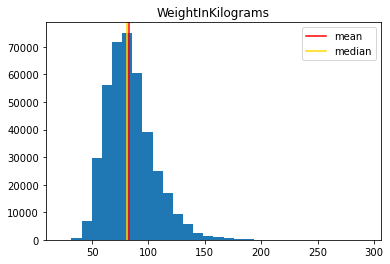

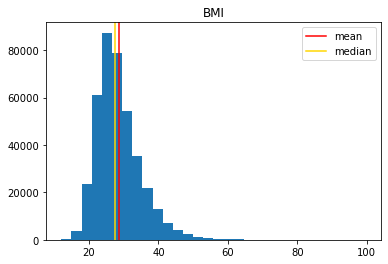

In [10]:
cols_to_impute = ['HeightInMeters','WeightInKilograms','BMI']

for col in cols_to_impute:
    
    plt.figure()
    plt.hist(dataset[col], bins=30)
    
    #add vertical lines to show the median and mean
    plt.axvline(dataset[col].mean(), c='r', label='mean')
    plt.axvline(dataset[col].median(), c='gold', label='median')
    
    # add legend
    plt.legend()
    
    # add title
    plt.title(f'{col}')

    plt.show()    
    

Imputing the missing data for the columns above with the median since it is more robust to outliers

In [11]:
for col in cols_to_impute:
    dataset[col] = dataset[col].fillna(dataset[col].median()) 

Ensuring that the distribution of these columns have not been severely impacted by the imputation:

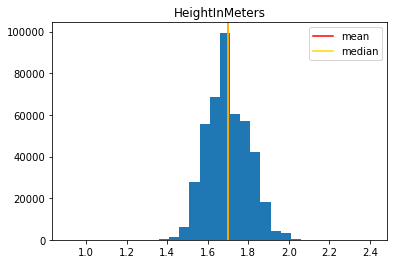

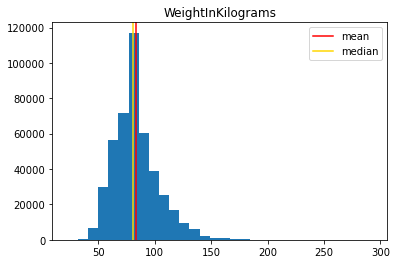

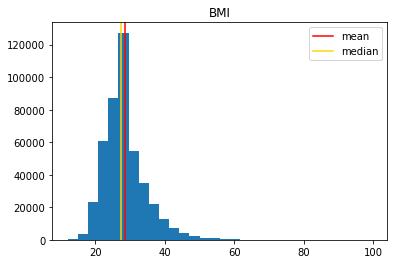

In [12]:
for col in cols_to_impute:
    
    plt.figure()
    plt.hist(dataset[col], bins=30)
    
    #add vertical lines to show the median and mean
    plt.axvline(dataset[col].mean(), c='r', label='mean')
    plt.axvline(dataset[col].median(), c='gold', label='median')
    
    # add legend
    plt.legend()
    
    # add title
    plt.title(f'{col}')

    plt.show()    

The decision to impute the missing values with the median does not skew the distribution of these columns.

Dealing with missing values in the discrete data columns:

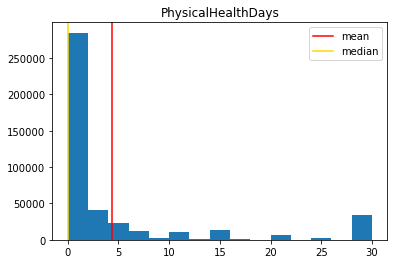

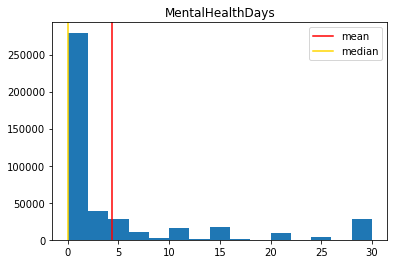

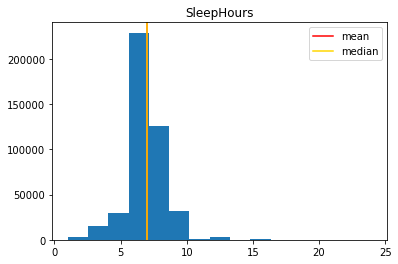

In [13]:
cols_to_impute = ['PhysicalHealthDays','MentalHealthDays','SleepHours']

for col in cols_to_impute:
    
    plt.figure()
    plt.hist(dataset[col], bins=15)
    
    #add vertical lines to show the median and mean
    plt.axvline(dataset[col].mean(), c='r', label='mean')
    plt.axvline(dataset[col].median(), c='gold', label='median')
    
    # add legend
    plt.legend()
    
    # add title
    plt.title(f'{col}')

    plt.show() 

Next, imputing the missing values of the columns above with the mode since it is a a good representation of the central tendency of the data, especially when dealing with discrete data.

In [14]:
for col in cols_to_impute:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0]) 

Ensuring that the distribution of these columns have not been severely impacted by the imputation:

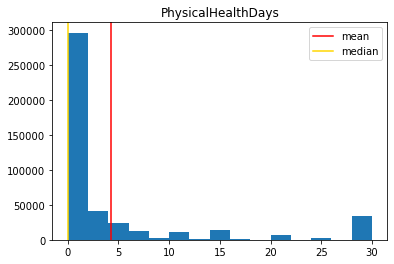

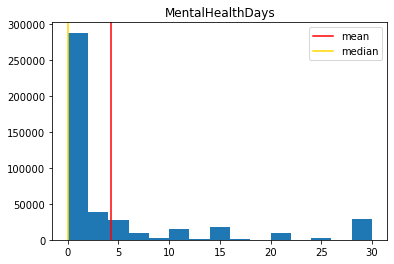

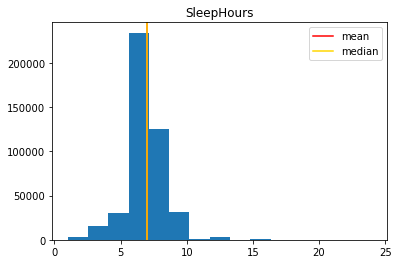

In [15]:
for col in cols_to_impute:
    
    plt.figure()
    plt.hist(dataset[col], bins=15)
    
    #add vertical lines to show the median and mean
    plt.axvline(dataset[col].mean(), c='r', label='mean')
    plt.axvline(dataset[col].median(), c='gold', label='median')
    
    # add legend
    plt.legend()
    
    # add title
    plt.title(f'{col}')

    plt.show() 

The decision to impute the missing values with the mode does not skew the distribution of these columns.

In [16]:
# What other missing values are left?
dataset.isna().mean()*100

State                         0.000000
Sex                           0.000000
GeneralHealth                 0.268105
PhysicalHealthDays            0.000000
MentalHealthDays              0.000000
LastCheckupTime               1.865498
PhysicalActivities            0.244508
SleepHours                    0.000000
RemovedTeeth                  2.551829
HadHeartAttack                0.687679
HadAngina                     0.988820
HadStroke                     0.348784
HadAsthma                     0.397326
HadSkinCancer                 0.705208
HadCOPD                       0.497556
HadDepressiveDisorder         0.630822
HadKidneyDisease              0.431710
HadArthritis                  0.590595
HadDiabetes                   0.243160
DeafOrHardOfHearing           4.607450
BlindOrVisionDifficulty       4.813529
DifficultyConcentrating       5.414911
DifficultyWalking             5.363672
DifficultyDressingBathing     5.341873
DifficultyErrands             5.733131
SmokerStatus             

#### Starting with the categorical values:

In [17]:
#Accessing the occurrence of each value in the columns
categorical_columns = dataset.select_dtypes(include=['object']).columns


for col in categorical_columns:
    print(f'{col}')
    print(dataset[col].value_counts())
    print("\n")

State
Washington              26142
New York                17784
Minnesota               16816
Ohio                    16482
Maryland                16410
Texas                   14237
Florida                 13385
Wisconsin               11273
Kansas                  11243
Massachusetts           11027
California              10948
Maine                   10646
Indiana                 10459
Virginia                10414
Arizona                 10184
Michigan                10054
South Carolina          10034
Utah                     9823
Connecticut              9771
Colorado                 9361
Georgia                  9234
Iowa                     8948
Vermont                  8801
New Jersey               8196
Hawaii                   7747
Nebraska                 7472
Missouri                 7438
South Dakota             7423
Montana                  7047
New Hampshire            6754
Idaho                    6280
Rhode Island             5891
Alaska                   5864
Okla

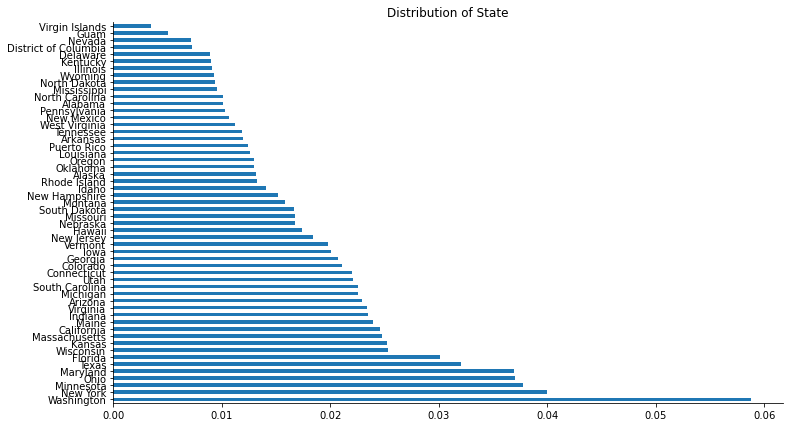

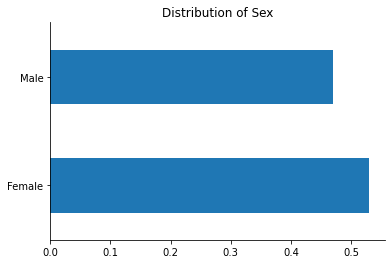

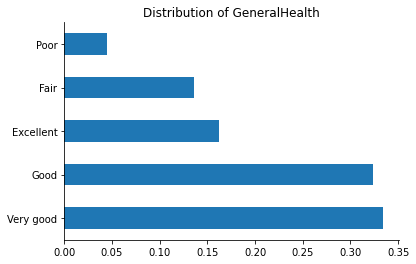

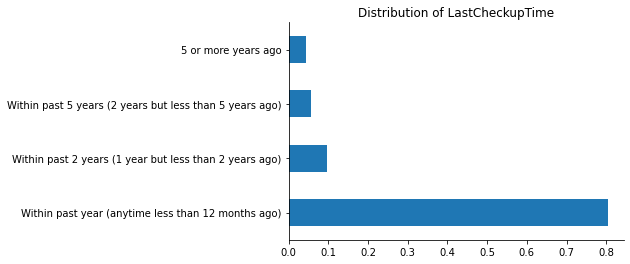

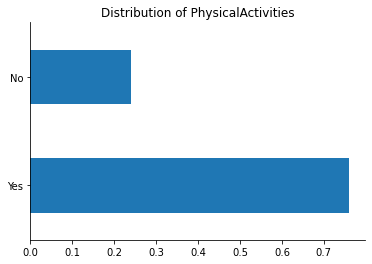

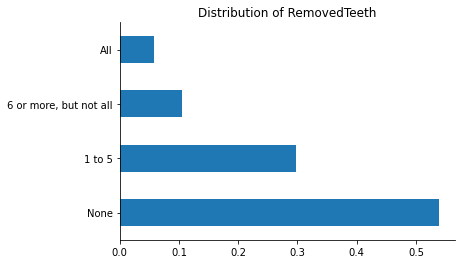

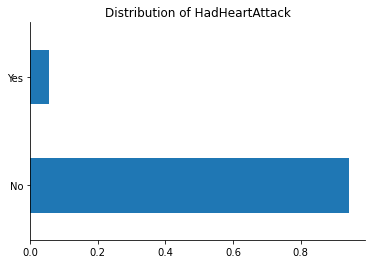

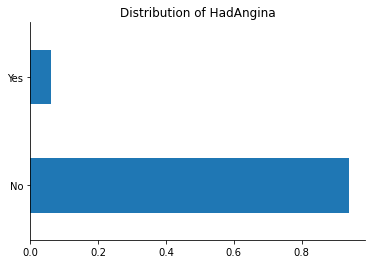

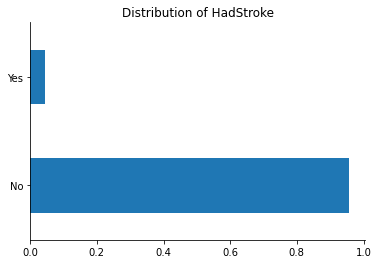

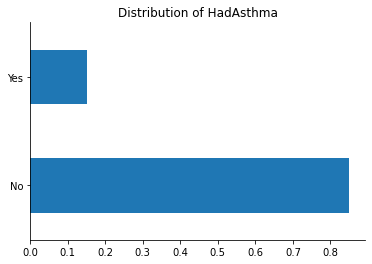

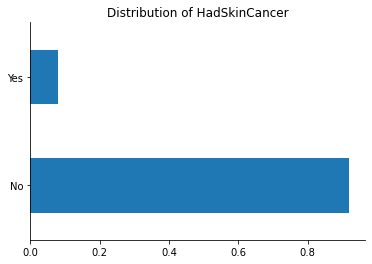

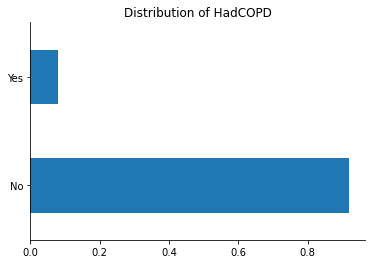

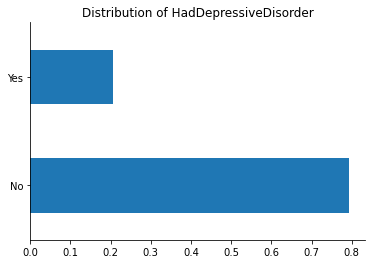

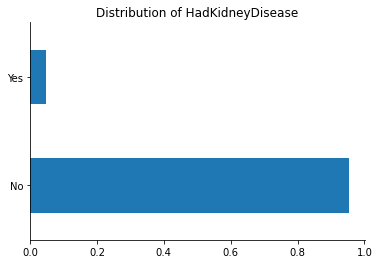

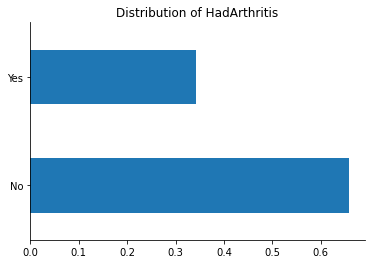

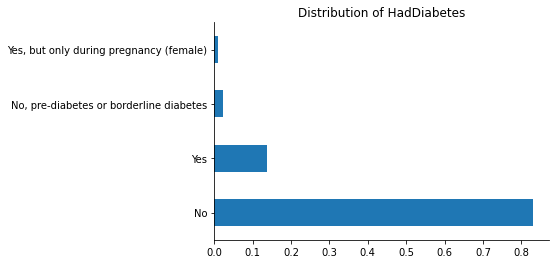

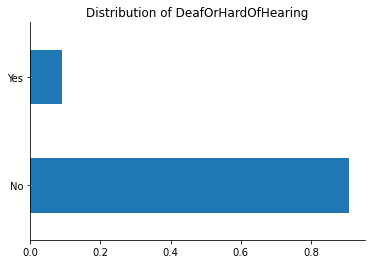

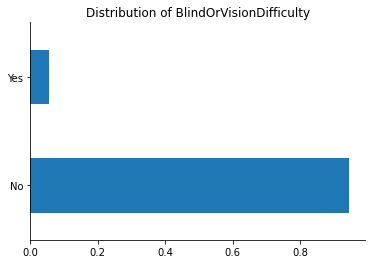

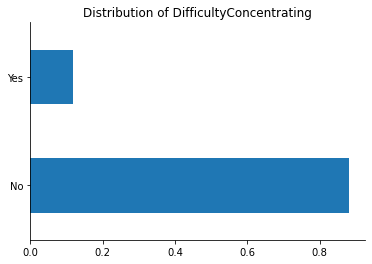

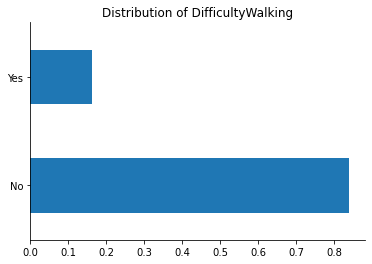

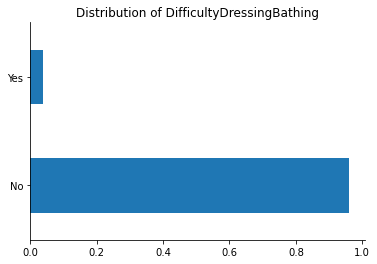

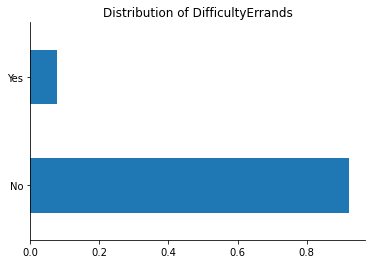

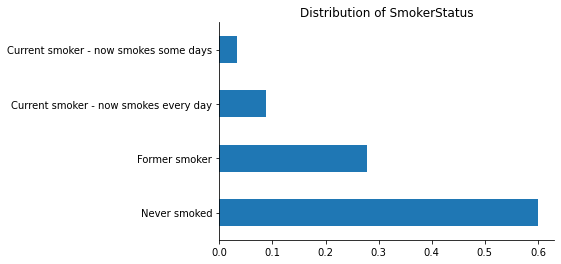

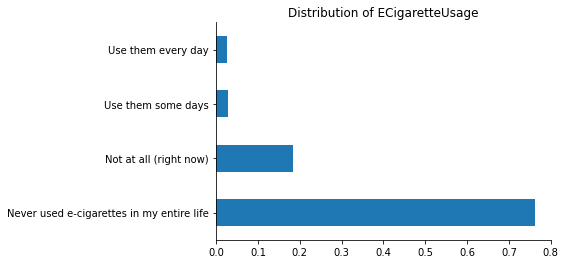

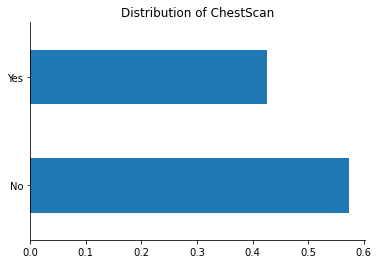

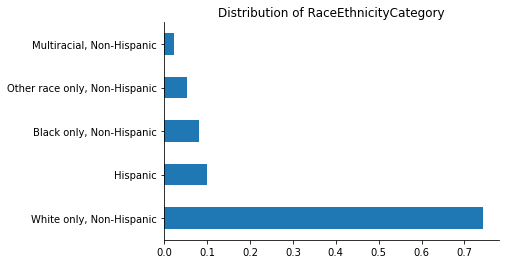

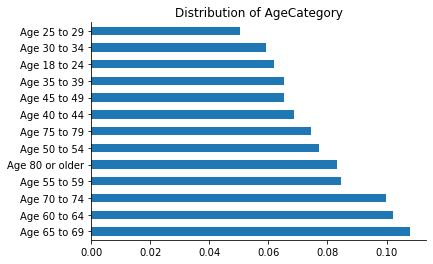

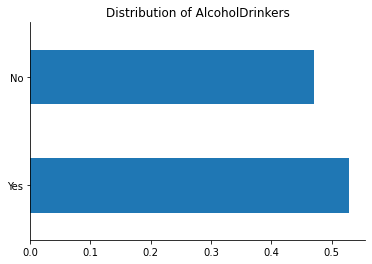

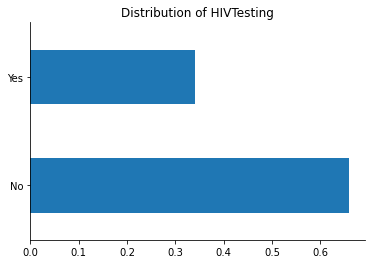

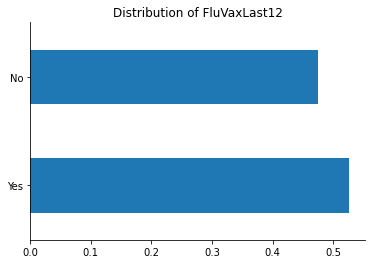

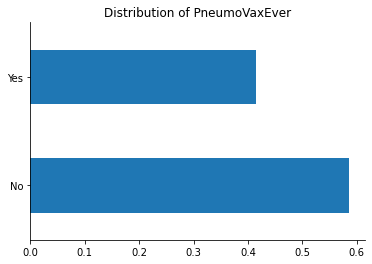

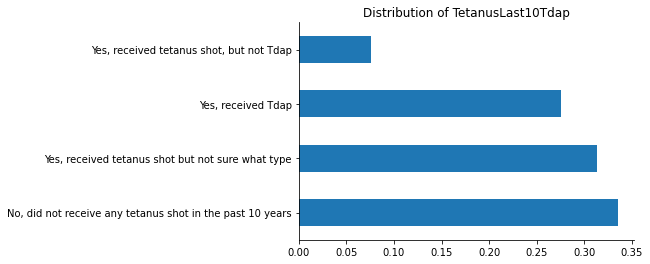

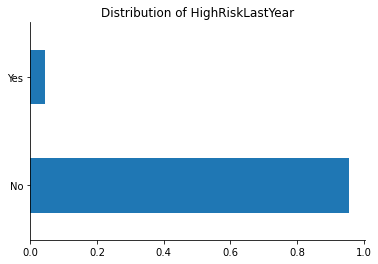

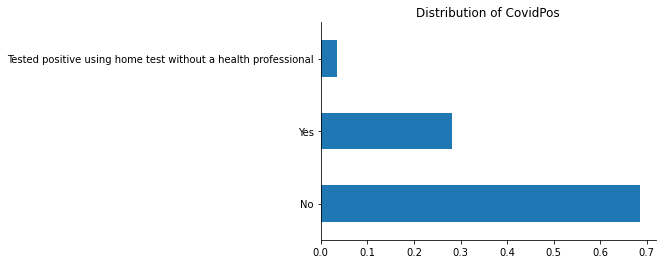

In [18]:
#Visualizing the distribution of the columns

plt.figure(figsize=(12, 7)) 

for col in categorical_columns:
    dataset[col].value_counts(normalize=True).plot(kind="barh")

    plt.title(f"Distribution of {col}")
    sns.despine()
    plt.show()

Imputing the missing values of the columns above with an 'unknown' category as there is the possibility that these missing values may carry some meaning. For example an individual may not have been willing to disclose whether or not they have tested for HIV.
Secondly it is the best choice to preserve the distribution of the datasets.

In [19]:
for col in categorical_columns:
    dataset[col] = dataset[col].fillna("unknown")

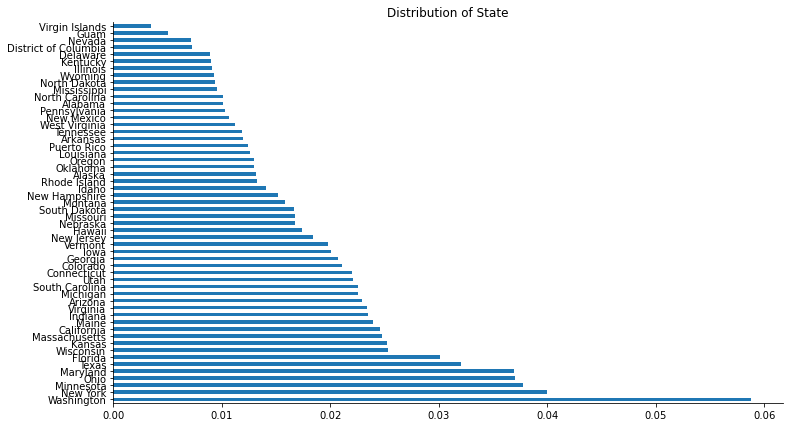

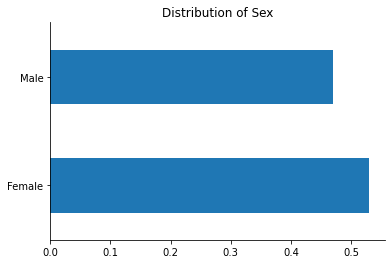

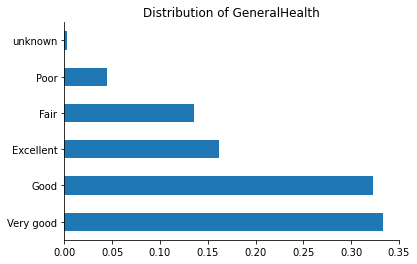

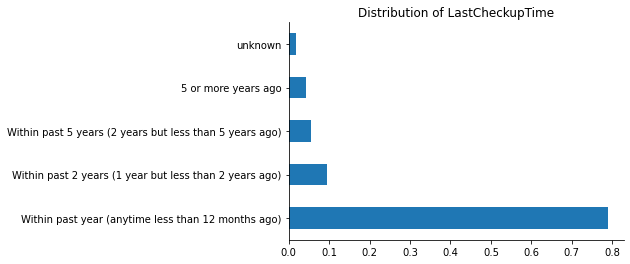

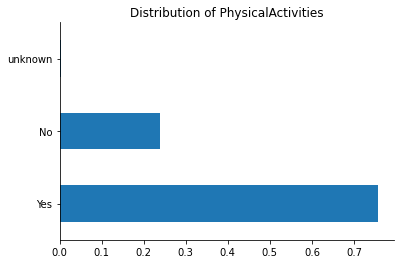

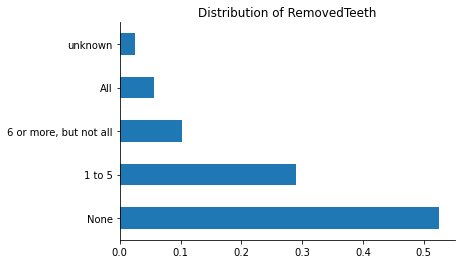

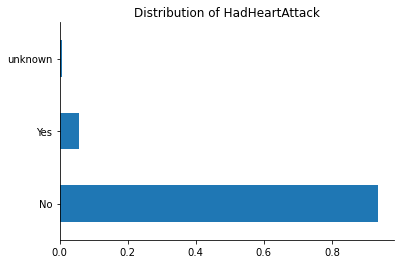

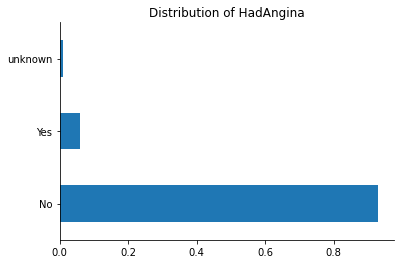

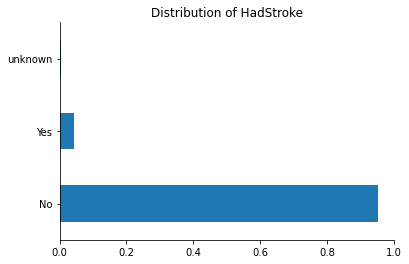

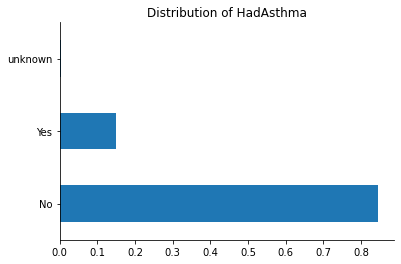

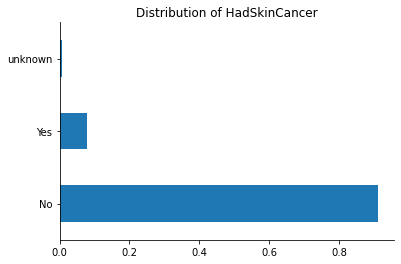

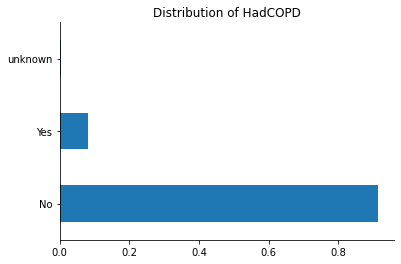

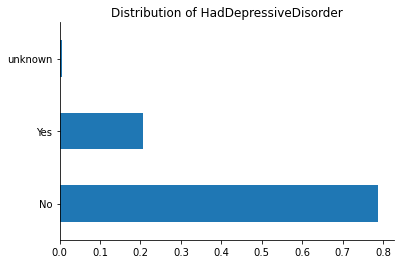

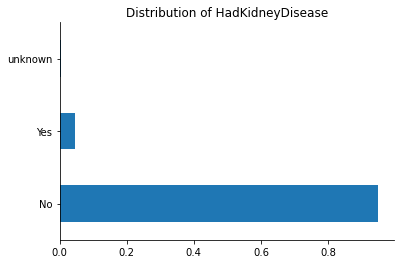

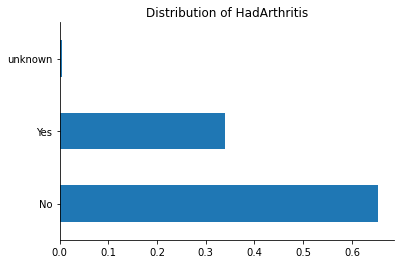

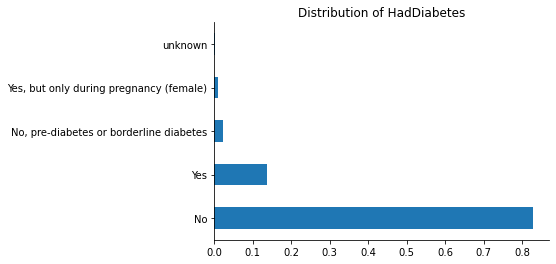

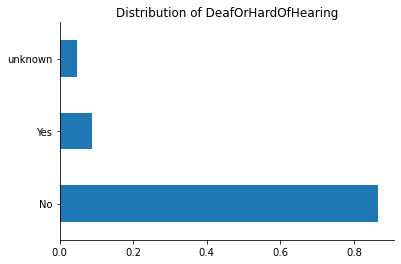

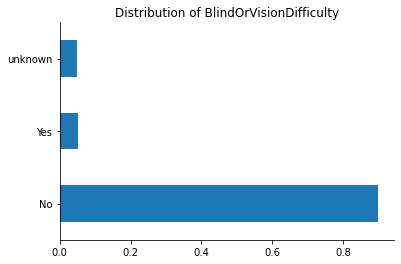

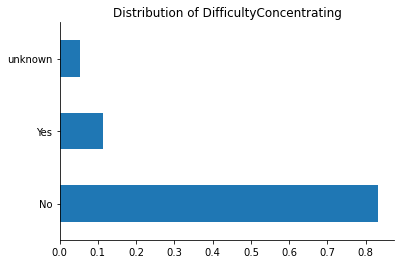

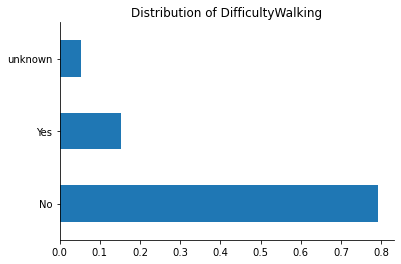

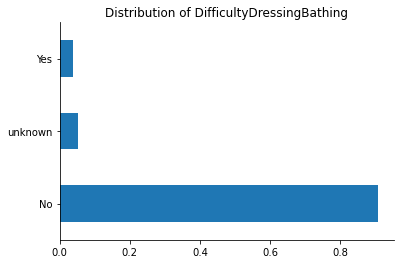

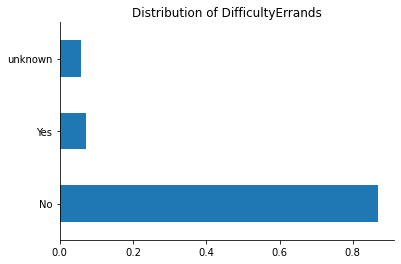

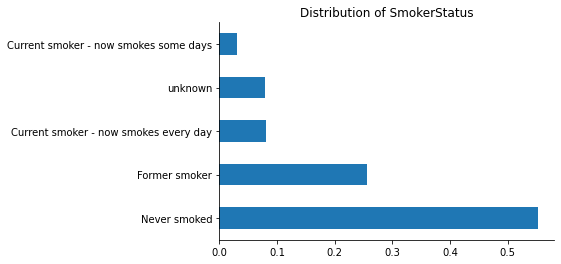

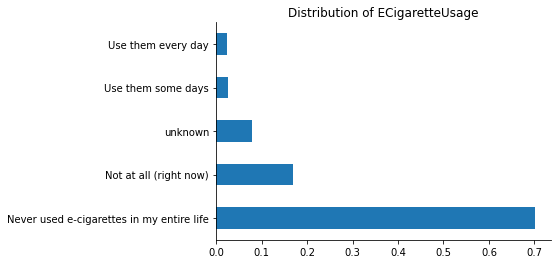

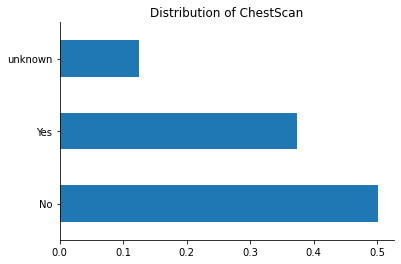

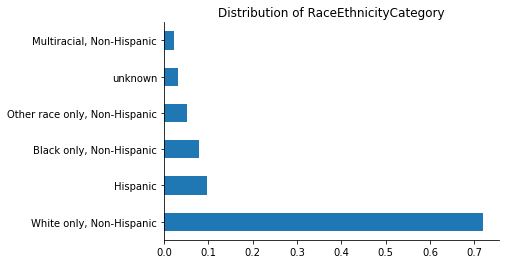

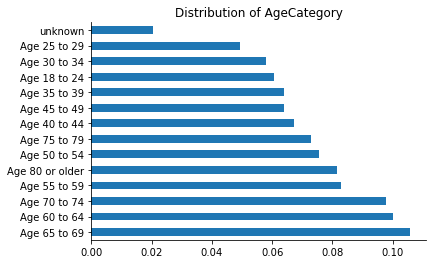

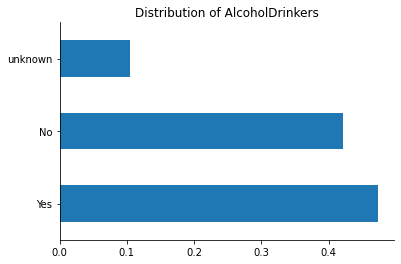

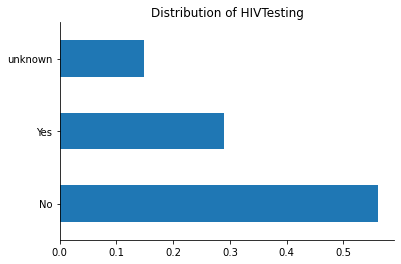

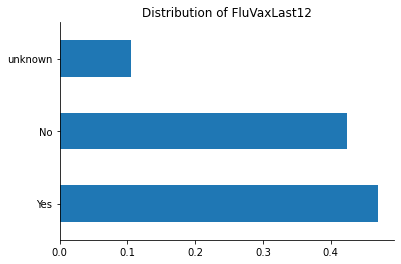

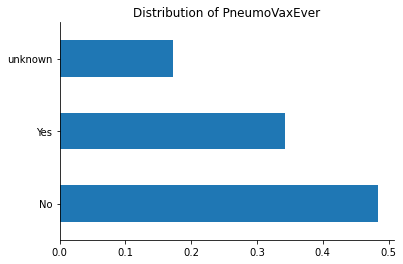

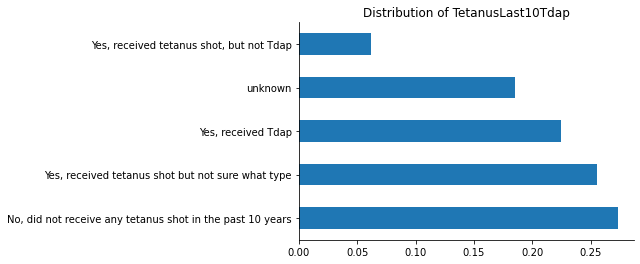

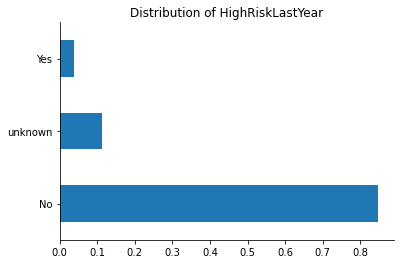

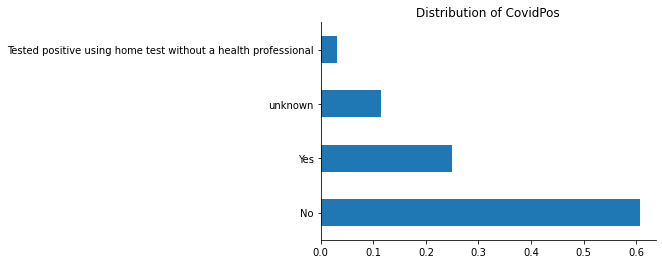

In [20]:
# Visualizing the distribution of the categorical columns after the missing values imputation:

plt.figure(figsize=(12, 7)) 

for col in categorical_columns:
    dataset[col].value_counts(normalize=True).plot(kind="barh")

    plt.title(f"Distribution of {col}")
    sns.despine()
    plt.show()

In [21]:
#Ensuring that there are no more missing values in the dataset:
dataset.isna().sum(axis=0)

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

There are no missing values in the dataset

## Exploratory Data Analysis

Next is, developing some insights about the data now that the dataset is cleaned.

The general question that should be answered in this case is:

> What factors increases the propensity of an individual to have a heart attack?

The following points will be covered:

1. Identify variables which are useful and relevant to the study. 
2. Identify trends and relationships between variables that helps to answer the objective.
3. Do the answers to the above lead to any other areas of investigation? 

Point 1: All variables seem to be relevant to the study as they contain information of the health status of an individual. Other personal information such as the state and age could also be relevant as the environment an individual lives in and their age could be a contributing factor to a heart attack.

Point 2: Identifying trends and relationships between variables that helps to answer the objective:

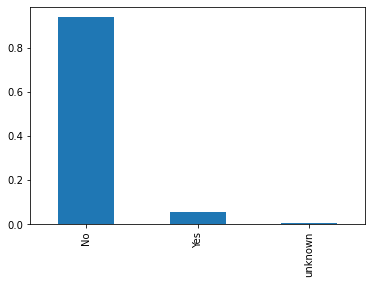

In [22]:
## Analysing the distributions of indivduals with a reported heart attack
dataset["HadHeartAttack"].value_counts(normalize=True).plot(kind="bar")
plt.show()

There is a significant disparity between the number of people who reported no heart attacks and the number of people who reported having a heart attack as well as the unknowns (people who may have skipped this question or provided incomplete responses).
This could potentially be a problem to some models as it could introduce some biases to the majority class (those who responded 'No'). Assigning a higher weight to the majority class or undersampling the majority class to create a more balanced dataset could produce better results.

<Figure size 2160x720 with 0 Axes>

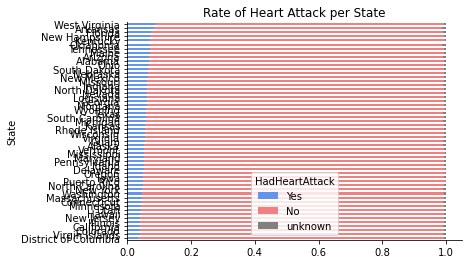

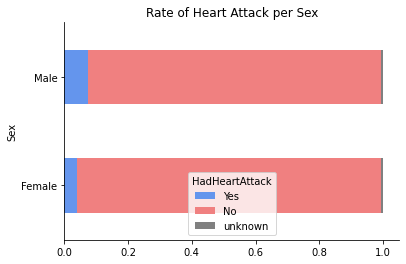

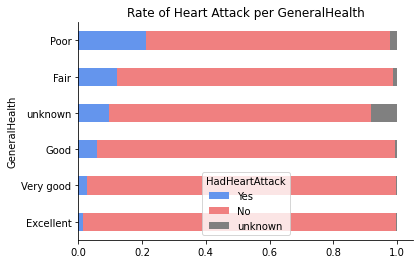

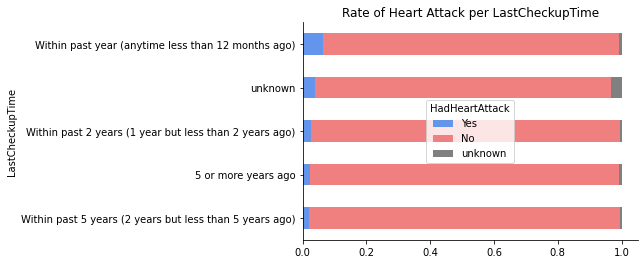

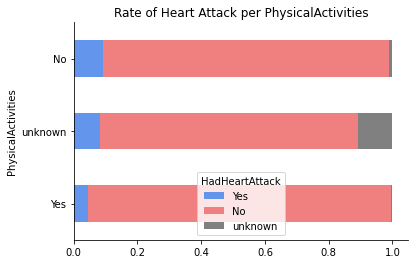

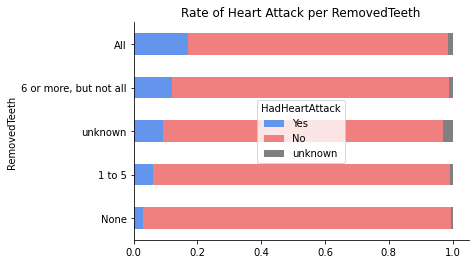

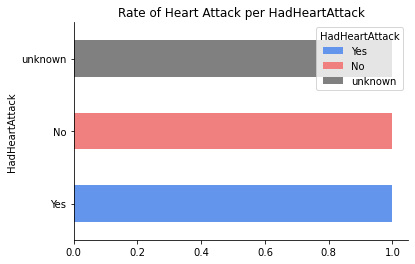

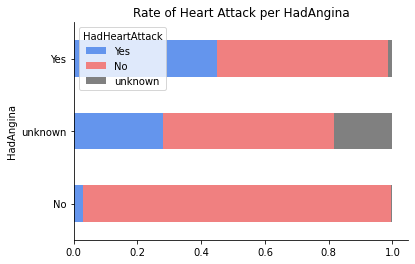

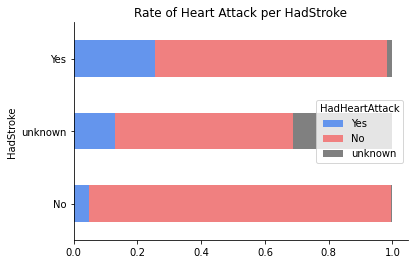

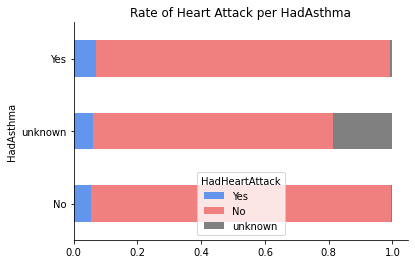

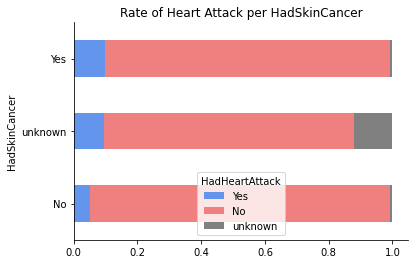

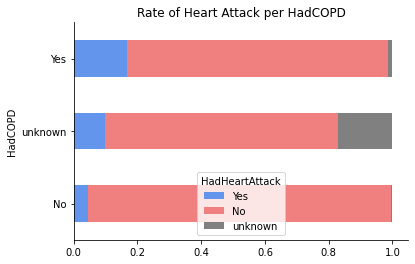

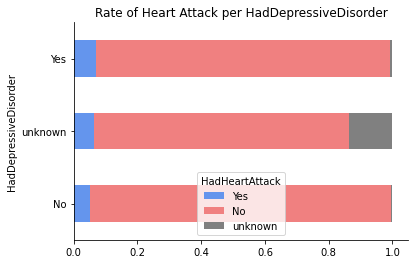

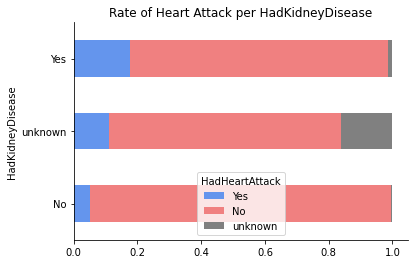

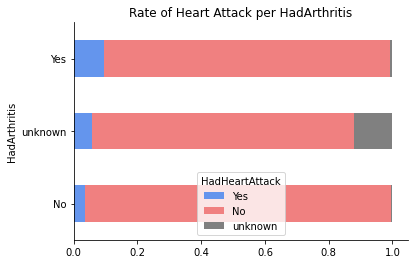

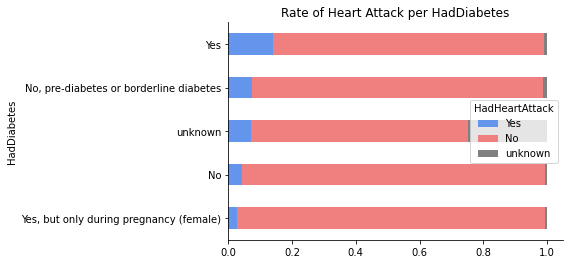

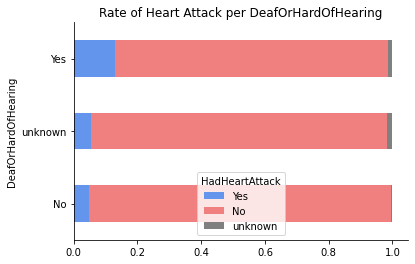

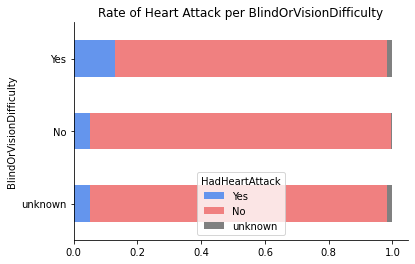

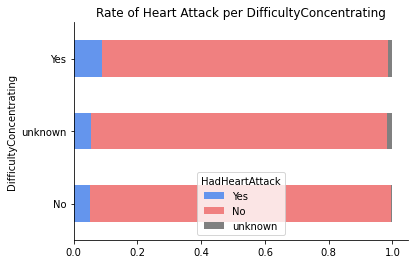

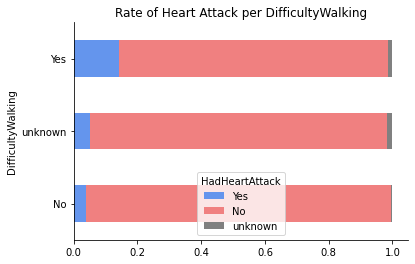

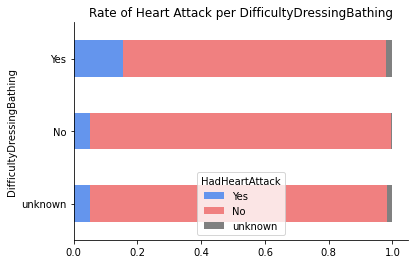

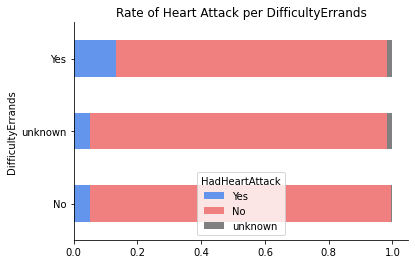

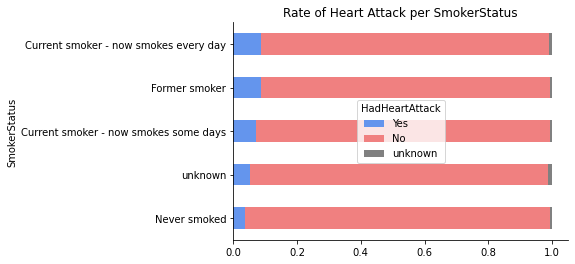

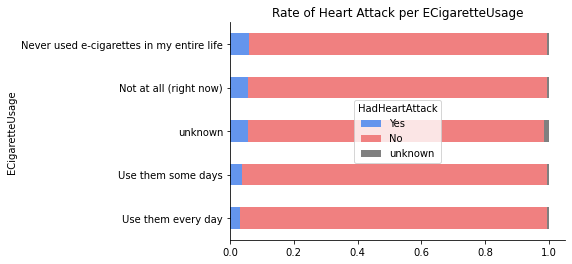

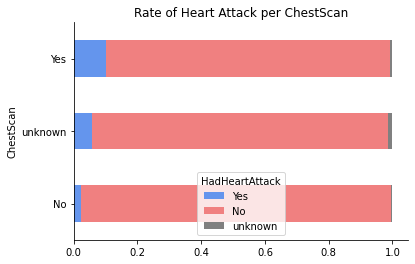

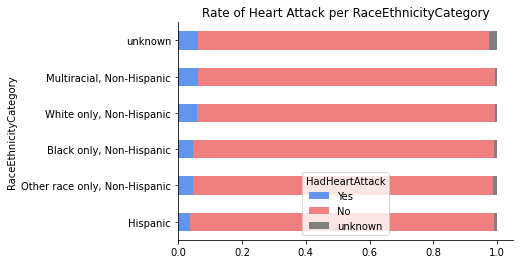

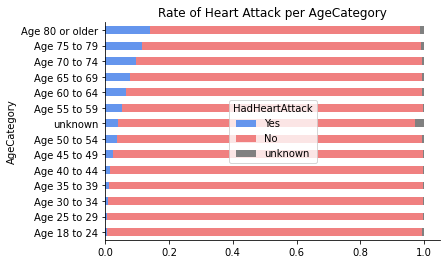

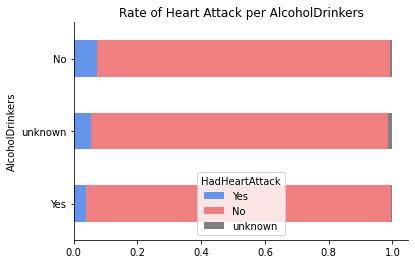

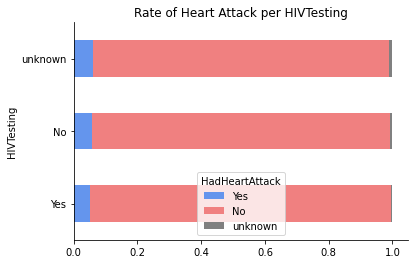

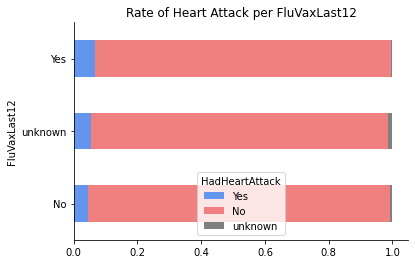

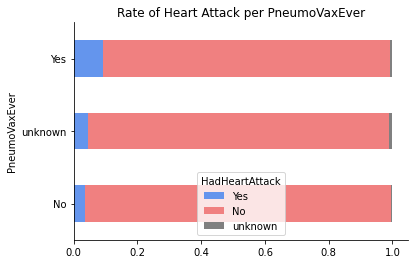

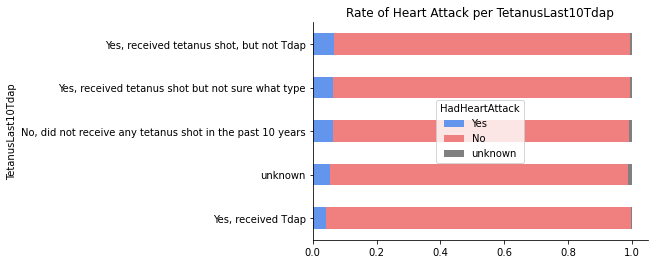

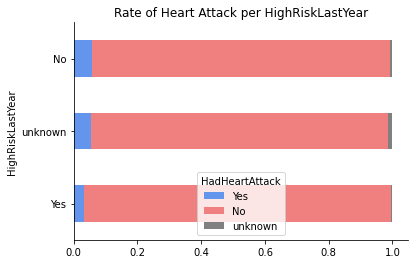

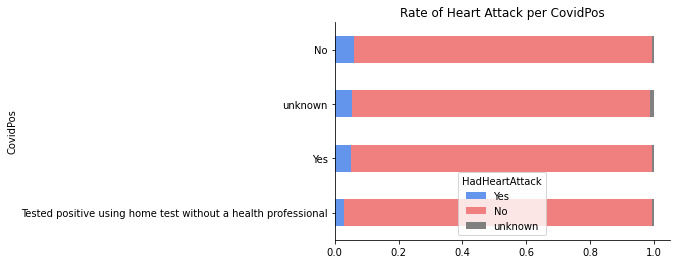

In [23]:
# Analysing the relationships between the target variable (HadHeartAttack) and the categorical columns:
plt.figure(figsize=(30, 10))
catdata_columns = dataset.select_dtypes(["object"]).columns

for column in catdata_columns:
    rate_data = dataset.groupby([column, "HadHeartAttack"])["HadHeartAttack"].count() / dataset.groupby(column)["HadHeartAttack"].count()
    rate_data.unstack()[["Yes", "No","unknown"]].sort_values("Yes").plot(kind="barh", stacked=True, color=["cornflowerblue", "lightcoral","gray"]) 
    plt.title(f"Rate of Heart Attack per {column}")
    sns.despine()
    plt.show()

In [24]:
# Analysing the rate of heart attack per the state column
rate_data_state = dataset.groupby(["State", "HadHeartAttack"])["HadHeartAttack"].count() / dataset.groupby("State")["HadHeartAttack"].count()

rate_data_state.unstack()[["Yes", "No","unknown"]].sort_values("Yes", ascending=False)


HadHeartAttack,Yes,No,unknown
State,,,
West Virginia,0.089139,0.903634,0.007227
Arkansas,0.085515,0.901676,0.012808
Florida,0.076055,0.915652,0.008293
New Hampshire,0.074030,0.918419,0.007551
Kentucky,0.071837,0.923440,0.004723
Oklahoma,0.071342,0.916883,0.011775
Tennessee,0.070479,0.923632,0.005889
Maine,0.070449,0.923727,0.005824
Arizona,0.069521,0.921053,0.009427


## Summary of preliminary findings for the categorical columns

Based on the analysis above:
- Among all the other states, individuals in West Virginia are more likely to have a heart attack.
- Males are more likely to have a heart attack than females.
- Individuals with a poor general health are more likely to have a heart attack.
- Individuals whose last checkup was less than 12 months from the time the survey data was collected were more likely to have a heart attack.
- Individuals who reported to participating in no physical activities are more likely to have a heart attack.
- Individuals who reported to having all of their teeth removed are more likely to have a heart attack.
- Individuals who reported to having Angina are more likely to have a heart attack.
- Individuals who reported to having stroke are more likely to have a heart attack.
- Individuals who reported to having asthma are more likely to have a heart attack.
- Individuals who reported to having skin cancer are more likely to have a heart attack.
- Individuals who reported to having COPD(Chronic Obstructive Pulmonary Disease) are more likely to have a heart attack.
- Individuals who reported to having a depressive disorder are more likely to have a heart attack.
- Individuals who reported to having kidney disease are more likely to have a heart attack.
- Individuals who reported to having arthritis are more likely to have a heart attack.
- Individuals who reported to having diabetes are more likely to have a heart attack.
- Individuals who reported to being deaf or hard of hearing are more likely to have a heart attack.
- Individuals who reported to being blind or having vision difficulty are more likely to have a heart attack.
- Individuals who reported to having difficulty concentrating are more likely to have a heart attack.
- Individuals who reported to having difficulty walking are more likely to have a heart attack.
- Individuals who reported to having difficulty dressing or bathing are more likely to have a heart attack.
- Individuals who reported to having difficilty running errands are more likely to have a heart attack.
- A current smoker who smokes every day is more likely to have a heart attack.
- People who have never used e-cigarettes are likely to have a heart attack.
- People who have had chest scans are more likely to have a heart attack (propbably due to underlying conditions).
- For race and ethnicity, individuals in the 'unknown' category are more likely to have a heart attack.
- Individuals 80 or older are more likely to have a heart attack.
- Non-alcoholic drinkers are more likely to have a heart attack.
- For HIV Testing, people in the 'unknown' category are more likely to have a heart attack than people who reported to having or not having an HIV Test.
- Individuals who have reported to having a flu vaccination in the last 12 months are more likely to have a heart attack.
- Individuals who reported to have had a pneumonia vaccination are more likely to have a heart attack.
- Individuals who reported to have had a Tetanus shot but not Tdap are more likely to have a heart attack.
- Individuals who reported to not being 'High Risk' in the last year and individuals who reported to not testing positive for covid are more likely to have a heart attack.

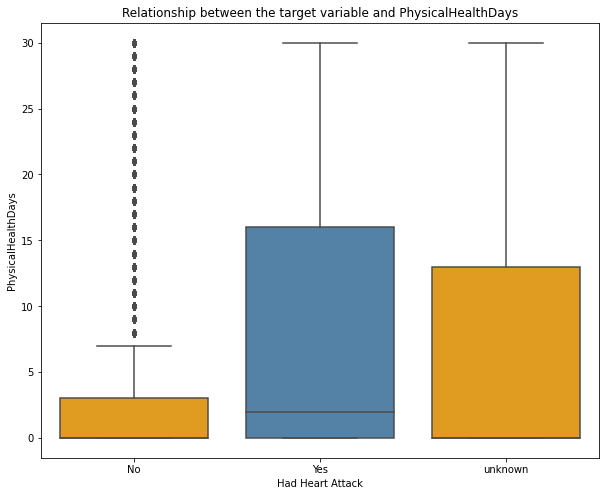

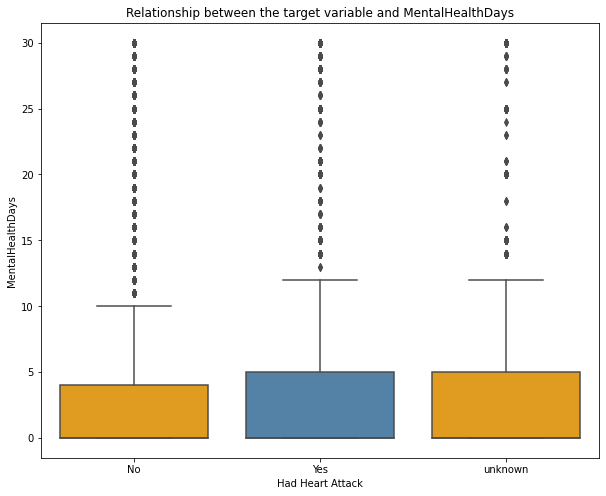

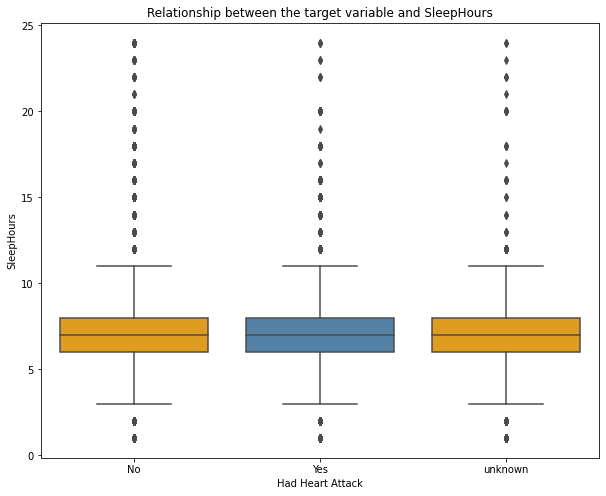

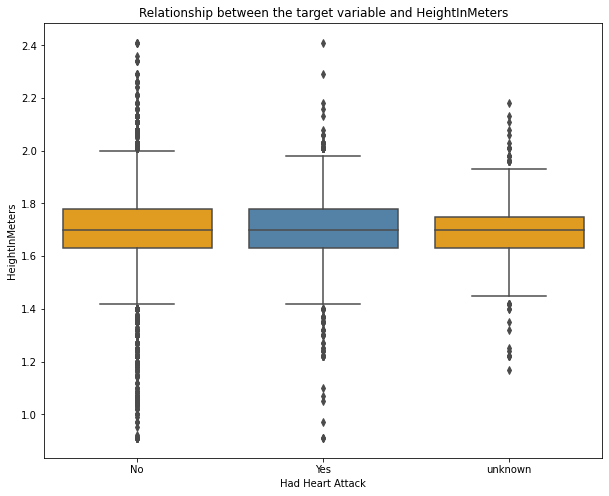

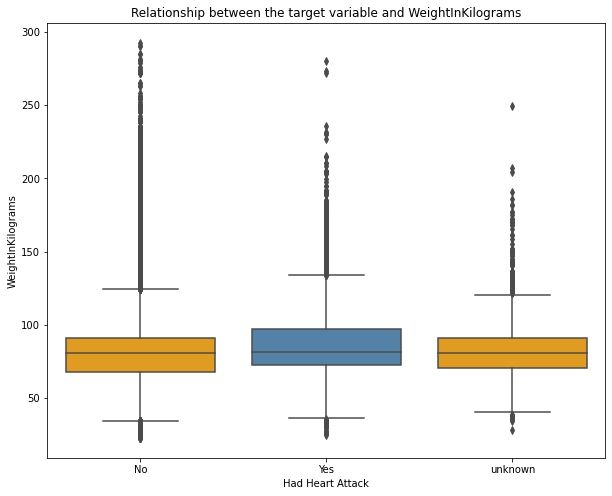

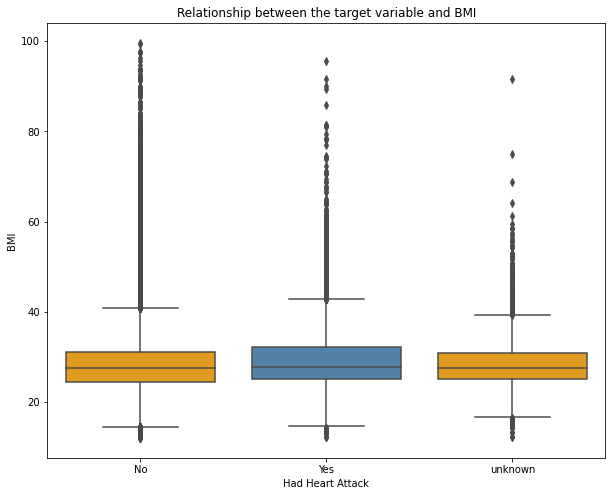

In [25]:
# Analysing the relationships between the target variable (HadHeartAttack) and the nmerical columns:

numdata_columns = dataset.select_dtypes(["float", "int"]).columns

for column in numdata_columns:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=dataset['HadHeartAttack'], y=dataset[column], palette=["orange", "steelblue"])

    plt.xlabel('Had Heart Attack')
    plt.ylabel(f'{column}')
    plt.title(f'Relationship between the target variable and {column}')

    plt.show()

## Summary of preliminary findings for the numerical columns

- People who have have had a heart attack are likely to have more physical health days. There is an indication of the presence of outliers in the distibution of people who reported to have no heart attack and the number of physical health days.
- People who have had a heart attack and people in the unknown category are more likely to have had more mental health days. There is also an indication of the presence of outliers across all categories.
- There doesn't seem to be a significant difference in the number of sleep hours across the various catgeories of the target variables. It is also important to note the presence of outliers in all the distributions.
- People who reported to having a heart attack and those who reported to not having a heart attack having similar height in meters howvever people in the 'unknown' category appear to be shorter. Again, it is important to note the presence of outliers across all the distibutions.
- People who reported to having a heart attack appear to have a greater weight in Kilograms as compared to individuals who reported to not having a heart attack and individuals in the "unknown" category. There seems to be the presence of outliers across all the distributions
- People who reported to having a heart attack appear to have a slightly higher BMI (body mass index) as compared to individuals in the other categories. Again there seems to be the presence of outliers across all the distributions.

## Data preprocessing and further analysis

Transforming all categorical variables into numeric variables for further analysis:

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444975 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      444975 non-null  object 
 1   Sex                        444975 non-null  object 
 2   GeneralHealth              444975 non-null  object 
 3   PhysicalHealthDays         444975 non-null  float64
 4   MentalHealthDays           444975 non-null  float64
 5   LastCheckupTime            444975 non-null  object 
 6   PhysicalActivities         444975 non-null  object 
 7   SleepHours                 444975 non-null  float64
 8   RemovedTeeth               444975 non-null  object 
 9   HadHeartAttack             444975 non-null  object 
 10  HadAngina                  444975 non-null  object 
 11  HadStroke                  444975 non-null  object 
 12  HadAsthma                  444975 non-null  object 
 13  HadSkinCancer              44

In [27]:
cat_columns = dataset.select_dtypes(["object"]).columns

for col in cat_columns:
    print(dataset[col].value_counts())
    print("\n")

Washington              26142
New York                17784
Minnesota               16816
Ohio                    16482
Maryland                16410
Texas                   14237
Florida                 13385
Wisconsin               11273
Kansas                  11243
Massachusetts           11027
California              10948
Maine                   10646
Indiana                 10459
Virginia                10414
Arizona                 10184
Michigan                10054
South Carolina          10034
Utah                     9823
Connecticut              9771
Colorado                 9361
Georgia                  9234
Iowa                     8948
Vermont                  8801
New Jersey               8196
Hawaii                   7747
Nebraska                 7472
Missouri                 7438
South Dakota             7423
Montana                  7047
New Hampshire            6754
Idaho                    6280
Rhode Island             5891
Alaska                   5864
Oklahoma  

In [28]:
# Transforming the sex column to a binary column:

dataset["Sex"] = dataset["Sex"].map({'Female': 0, 'Male': 1})

In [29]:
#Transforming AgeCategory to 'Unknown', 'Young', 'Middle Age' or Older
dataset["AgeCategory"] = dataset["AgeCategory"].map({'unknown':'unknown', 'Age 25 to 29':'young', 'Age 30 to 34':'young', 
                                                    'Age 18 to 24':'young', 'Age 35 to 39':'young', 'Age 45 to 49':'middle-aged',
                                                    'Age 40 to 44':'middle-aged', 'Age 75 to 79':'older', 'Age 50 to 54':'middle-aged',
                                                    'Age 80 or older':'older','Age 55 to 59':'middle-aged','Age 70 to 74':'older',
                                                    'Age 60 to 64':'middle-aged','Age 65 to 69':'middle-aged'})

In [30]:
cat_columns = dataset.select_dtypes(["object"]).columns

for col in cat_columns:
    print(dataset[col].value_counts())
    print("\n")

Washington              26142
New York                17784
Minnesota               16816
Ohio                    16482
Maryland                16410
Texas                   14237
Florida                 13385
Wisconsin               11273
Kansas                  11243
Massachusetts           11027
California              10948
Maine                   10646
Indiana                 10459
Virginia                10414
Arizona                 10184
Michigan                10054
South Carolina          10034
Utah                     9823
Connecticut              9771
Colorado                 9361
Georgia                  9234
Iowa                     8948
Vermont                  8801
New Jersey               8196
Hawaii                   7747
Nebraska                 7472
Missouri                 7438
South Dakota             7423
Montana                  7047
New Hampshire            6754
Idaho                    6280
Rhode Island             5891
Alaska                   5864
Oklahoma  

In [31]:
#Transforming the other columns into dummy variables
dummydataset = pd.get_dummies(dataset)
print(dummydataset.info())
print("\n")

#Analyzing the columns for reference categories
for col in dummydataset.columns:
    print(col)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444975 entries, 0 to 445131
Columns: 177 entries, Sex to CovidPos_unknown
dtypes: float64(6), int64(1), uint8(170)
memory usage: 115.4 MB
None


Sex
PhysicalHealthDays
MentalHealthDays
SleepHours
HeightInMeters
WeightInKilograms
BMI
State_Alabama
State_Alaska
State_Arizona
State_Arkansas
State_California
State_Colorado
State_Connecticut
State_Delaware
State_District of Columbia
State_Florida
State_Georgia
State_Guam
State_Hawaii
State_Idaho
State_Illinois
State_Indiana
State_Iowa
State_Kansas
State_Kentucky
State_Louisiana
State_Maine
State_Maryland
State_Massachusetts
State_Michigan
State_Minnesota
State_Mississippi
State_Missouri
State_Montana
State_Nebraska
State_Nevada
State_New Hampshire
State_New Jersey
State_New Mexico
State_New York
State_North Carolina
State_North Dakota
State_Ohio
State_Oklahoma
State_Oregon
State_Pennsylvania
State_Puerto Rico
State_Rhode Island
State_South Carolina
State_South Dakota
State_Tennessee
State_Te

In [32]:
#Removing the reference category for each dummy variable
reference_categories = ['State_Alabama','GeneralHealth_unknown','LastCheckupTime_unknown','PhysicalActivities_unknown',
                        'RemovedTeeth_unknown','HadHeartAttack_unknown','HadAngina_unknown','HadStroke_unknown',
                        'HadAsthma_unknown','HadSkinCancer_unknown','HadCOPD_unknown','HadDepressiveDisorder_unknown',
                        'HadKidneyDisease_unknown','HadArthritis_unknown','DeafOrHardOfHearing_unknown','BlindOrVisionDifficulty_unknown',
                        'DifficultyConcentrating_unknown','DifficultyWalking_unknown','DifficultyDressingBathing_unknown',
                        'DifficultyErrands_unknown','ChestScan_unknown','AlcoholDrinkers_unknown','HIVTesting_unknown',
                        'FluVaxLast12_unknown','PneumoVaxEver_unknown','HighRiskLastYear_unknown','CovidPos_unknown',
                        'HadDiabetes_unknown','SmokerStatus_unknown','ECigaretteUsage_unknown','RaceEthnicityCategory_unknown',
                        'AgeCategory_unknown','TetanusLast10Tdap_unknown']

dummydataset.drop(columns=reference_categories, inplace=True)

In [33]:
dummydataset.shape

(444975, 144)

The dataset has been transformed into numerical values with 444,975 rows and 144 columns

## Analyzing the correlation between the Dependent and Independent variables

After transformation, independent variable will be: HadHeartAttack_Yes

In [34]:
# Calculate the correlation matrix
#corr_matrix = np.corrcoef(dummydataset, rowvar=False)
corr_matrix = dummydataset.corr()['HadHeartAttack_Yes']

for column, correlation in corr_matrix.iteritems():
    if correlation > 0.4:
        print(f"Correlation with '{column}': {correlation}")

Correlation with 'HadHeartAttack_Yes': 1.0
Correlation with 'HadAngina_Yes': 0.42802498076453893


Generally, there doesn't seem to be a strong correlation between the dependent and independent variables. The highest correlation is 0.43 between whether an individual previously had Angina.